# Microproyecto 3 - Grupo 9 - FIFA 21

Luisa Fernanda Orozco

Emanuel Zapata

Emmanuel Ángel

Se busca realizar un programa que permita predecir la posición más adecuada para un jugador teniendo en cuenta las características y atributos que este presenta.

Inicialmente se importan las librerías necesarias y el dataset con el cual se va a trabajar.

In [ ]:
# Importando librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import tree
from subprocess import check_call
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
pd.set_option("max_rows", None)
pd.set_option('max_columns', None)

In [ ]:
from google.colab import files
import io

uploaded = files.upload()
players_21 = pd.read_csv(io.BytesIO(uploaded["players_21.csv"]))



Saving players_21.csv to players_21 (2).csv


In [ ]:
players=players_21.copy()

Los datos recogen la información de los jugadores de la FIFA en el 2021. Para cada jugador, se indican características como: Nombre, fecha de nacimiento, edad (años), altura (cm), peso (kg), nacionalidad, nombre del club al que pertenece, nombre de la liga a la que pertenece, posición (es), pie preferido, y entre otras características relacionadas con su desempeño en un partido promedio, y así mismo para cada una de las diferentes categorías que pueden ser analizadas (como desempeño en su país, puntuación en diferentes acciones durante el partido, etc).

In [ ]:
np.shape(players)

(18944, 80)

Se aprecia que la tabla tiene 18944 filas y 80 columnas.

En esta parte se observa que cada fila hace referencia a un jugador y las columnas a una característica del mismo.

In [ ]:
players.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        188         87    Slovenia      Atlético Madrid   
3        184         80      Poland    FC Bayern München   
4        175         68      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         93   67500000   
1         Italian Serie A          1.0       92         92   46000000   
2  Spain Primera Division          1.0       91         93   75000000   
3    German 1. Bundesliga          1.0       91         91   80000000   
4          French Ligue 1          1.0       91         91   90000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    560000       RW, ST, CF           Left                         5   
1    220000           ST, LW          Right                         5   
2    125000               GK          Right                         3   
3    240000               ST          Right                         4   
4    270000          LW, CAM          Right                         5   

   weak_foot  skill_moves      work_rate             body_type real_face  \
0          4            4     Medium/Low                 Messi       Yes   
1          4            5       High/Low            C. Ronaldo       Yes   
2          3            1  Medium/Medium  PLAYER_BODY_TYPE_259       Yes   
3          4            4    High/Medium  PLAYER_BODY_TYPE_276       Yes   
4          5            5    High/Medium                Neymar       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2         159400000.0                                                NaN   
3         132000000.0              #Distance Shooter, #Clinical Finisher   
4         166500000.0  #Speedster, #Dribbler, #Playmaker, #FK Special...   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0         NaN  2004-07-01   
1            LS                 7.0         NaN  2018-07-10   
2            GK                13.0         NaN  2014-07-16   
3            ST                 9.0         NaN  2014-07-01   
4            LW                10.0         NaN  2017-08-03   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
2                2023.0              GK                   1.0   NaN       NaN   
3                2023.0             NaN                   NaN  78.0      91.0   
4                2022.0             NaN                   NaN  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.0       38.0

Ahora se inicia con un pre-procesamiento de los datos para que el algoritmo sea más eficiente y confiable.

Como se cuenta con una cantidad de datos tan grande, y cada jugador puede presentar diferentes posiciones, se decidió tomar en cuenta solo la primera posición para cada jugador. Para hacer esto, se procede a realizar una tabla con estas posiciones, y se toma solo la primera columna, luego se reemplazan estos datos en el dataset original.

In [ ]:
positions=players['player_positions'].str.split(expand=True)

In [ ]:
positions.head()

0     1     2
0  RW,   ST,    CF
1  ST,    LW  None
2   GK  None  None
3   ST  None  None
4  LW,   CAM  None

In [ ]:
players['position']=positions[0].str.replace(',','').astype(str)

In [ ]:
players.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        188         87    Slovenia      Atlético Madrid   
3        184         80      Poland    FC Bayern München   
4        175         68      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         93   67500000   
1         Italian Serie A          1.0       92         92   46000000   
2  Spain Primera Division          1.0       91         93   75000000   
3    German 1. Bundesliga          1.0       91         91   80000000   
4          French Ligue 1          1.0       91         91   90000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    560000       RW, ST, CF           Left                         5   
1    220000           ST, LW          Right                         5   
2    125000               GK          Right                         3   
3    240000               ST          Right                         4   
4    270000          LW, CAM          Right                         5   

   weak_foot  skill_moves      work_rate             body_type real_face  \
0          4            4     Medium/Low                 Messi       Yes   
1          4            5       High/Low            C. Ronaldo       Yes   
2          3            1  Medium/Medium  PLAYER_BODY_TYPE_259       Yes   
3          4            4    High/Medium  PLAYER_BODY_TYPE_276       Yes   
4          5            5    High/Medium                Neymar       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2         159400000.0                                                NaN   
3         132000000.0              #Distance Shooter, #Clinical Finisher   
4         166500000.0  #Speedster, #Dribbler, #Playmaker, #FK Special...   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0         NaN  2004-07-01   
1            LS                 7.0         NaN  2018-07-10   
2            GK                13.0         NaN  2014-07-16   
3            ST                 9.0         NaN  2014-07-01   
4            LW                10.0         NaN  2017-08-03   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
2                2023.0              GK                   1.0   NaN       NaN   
3                2023.0             NaN                   NaN  78.0      91.0   
4                2022.0             NaN                   NaN  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.0       38.0

Se buscan los elementos únicos del target que se quiere predecir, para posteriormente contabilizar cuántos hay en total de cada uno y realizar un gráfico de barras.

In [ ]:
players['position'].unique()

array(['RW', 'ST', 'GK', 'LW', 'CAM', 'CB', 'CF', 'CDM', 'CM', 'RM', 'RB',
       'LB', 'LM', 'RWB', 'LWB'], dtype=object)

Acá se puede observar que hay 15 posibles posiciones para los jugadores, y a continuación se muestra la cantidad de jugadores que hacen parte de cada posición.

In [ ]:
players.groupby('position').size()

position
CAM    1148
CB     3252
CDM    1514
CF      115
CM     2241
GK     2084
LB     1402
LM     1069
LW      420
LWB     100
RB     1363
RM     1065
RW      438
RWB      88
ST     2645
dtype: int64

Gráfico de la información anterior para observar la distribución de la variable objetivo.

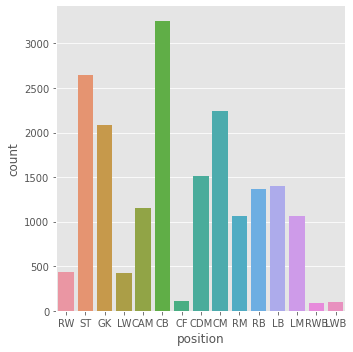

In [ ]:
sb.catplot(x='position', data=players, kind="count")

Se asigna una etiqueta numérica para las características de "position" y "preferred_foot" empezando desde 0 en cada caso.

In [ ]:
label_encoding = preprocessing.LabelEncoder()
players['positionEncoded'] = label_encoding.fit_transform(players['position'].astype(str))
players['preferred_foot'] = label_encoding.fit_transform(players['preferred_foot'].astype(str))
players.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        188         87    Slovenia      Atlético Madrid   
3        184         80      Poland    FC Bayern München   
4        175         68      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         93   67500000   
1         Italian Serie A          1.0       92         92   46000000   
2  Spain Primera Division          1.0       91         93   75000000   
3    German 1. Bundesliga          1.0       91         91   80000000   
4          French Ligue 1          1.0       91         91   90000000   

   wage_eur player_positions  preferred_foot  international_reputation  \
0    560000       RW, ST, CF               0                         5   
1    220000           ST, LW               1                         5   
2    125000               GK               1                         3   
3    240000               ST               1                         4   
4    270000          LW, CAM               1                         5   

   weak_foot  skill_moves      work_rate             body_type real_face  \
0          4            4     Medium/Low                 Messi       Yes   
1          4            5       High/Low            C. Ronaldo       Yes   
2          3            1  Medium/Medium  PLAYER_BODY_TYPE_259       Yes   
3          4            4    High/Medium  PLAYER_BODY_TYPE_276       Yes   
4          5            5    High/Medium                Neymar       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2         159400000.0                                                NaN   
3         132000000.0              #Distance Shooter, #Clinical Finisher   
4         166500000.0  #Speedster, #Dribbler, #Playmaker, #FK Special...   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0         NaN  2004-07-01   
1            LS                 7.0         NaN  2018-07-10   
2            GK                13.0         NaN  2014-07-16   
3            ST                 9.0         NaN  2014-07-01   
4            LW                10.0         NaN  2017-08-03   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
2                2023.0              GK                   1.0   NaN       NaN   
3                2023.0             NaN                   NaN  78.0      91.0   
4                2022.0             NaN                   NaN  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.0     

Preferred_foot: 0-Left, 1-Right

0 -CAM
1-CB
2-CDM
3-CF
4-CM
5-GK
6-LB
7-LM
8-LW
9-LWB
10-RB
11-RM
12-RW
13-RWB
14-ST

In [ ]:
class_names=['CAM', 'CB','CDM','CF','CM','GK','LB','LM','LW','LWB','RB','RM','RW','RWB','ST']

Se definen las features que pueden afectar la variable objetivo 

In [ ]:
features=['movement_reactions','height_cm','weight_kg','preferred_foot','team_jersey_number','attacking_crossing','attacking_finishing',	'attacking_heading_accuracy',
          'attacking_short_passing',	'attacking_volleys'	,'skill_dribbling',	'skill_curve',	'skill_fk_accuracy',	'skill_long_passing',	'skill_ball_control',	
          'movement_acceleration'	,'movement_sprint_speed',	'movement_agility'	,'movement_balance'	,'power_shot_power',	'power_jumping',
          'power_stamina',	'power_strength',	'power_long_shots',	'mentality_aggression',	'mentality_interceptions',	'mentality_positioning'	,'mentality_vision'	,
          'mentality_penalties',	'mentality_composure',	'defending_standing_tackle'	,'defending_sliding_tackle','goalkeeping_diving',	'goalkeeping_handling',
          'goalkeeping_kicking',	'goalkeeping_positioning'	,'goalkeeping_reflexes']

target=['positionEncoded']

Se agrega a los datos la información anterior.

In [ ]:
data=players[features+target]
data = data.astype('float64')

Se observa cómo quedan los datos luego de haber hecho las modificaciones anteriores.

In [ ]:
data.tail()

movement_reactions  height_cm  weight_kg  preferred_foot  \
18939                51.0      176.0       73.0             1.0   
18940                48.0      177.0       70.0             1.0   
18941                45.0      185.0       74.0             1.0   
18942                51.0      186.0       80.0             1.0   
18943                44.0      185.0       79.0             1.0   

       team_jersey_number  attacking_crossing  attacking_finishing  \
18939                28.0                45.0                 37.0   
18940                25.0                23.0                 16.0   
18941                 2.0                20.0                 20.0   
18942                 4.0                38.0                 32.0   
18943                33.0                44.0                 32.0   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
18939                        43.0                     55.0               27.0   
18940                        45.0                     31.0               26.0   
18941                        46.0                     40.0               22.0   
18942                        45.0                     56.0               32.0   
18943                        44.0                     56.0               35.0   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
18939             44.0         35.0               35.0                53.0   
18940             19.0         21.0               22.0                25.0   
18941             35.0         20.0               25.0                25.0   
18942             45.0         35.0               35.0                54.0   
18943             46.0         37.0               33.0                56.0   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
18939                46.0                   64.0                   62.0   
18940                24.0                   60.0                   56.0   
18941                30.0                   54.0                   49.0   
18942                48.0                   62.0                   60.0   
18943                43.0                   67.0                   64.0   

       movement_agility  movement_balance  power_shot_power  power_jumping  \
18939              53.0              71.0              43.0           57.0   
18940              45.0              70.0              35.0           65.0   
18941              40.0              57.0              35.0           69.0   
18942              59.0              53.0              45.0           56.0   
18943              56.0              55.0              49.0           59.0   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
18939           40.0            51.0              36.0                  57.0   
18940           55.0            45.0              23.0                  44.0   
18941           58.0            55.0              22.0                  46.0   
18942           48.0            63.0              33.0                  56.0   
18943           54.0            62.0              34.0                  57.0   

       mentality_interceptions  mentality_positioning  mentality_vision  \
18939                     41.0                   31.0              49.0   
18940                     50.0                   25.0              25.0   
18941                     45.0                   25.0              25.0   
18942                     40.0                   31.0              45.0   
18943                     35.0                   48.0              44.0   

       mentality_penalties  mentality_composure  defending_standing_tackle  \
18939                 39.0                 36.0                       39.0   
18940                 35.0                 40.0                       56.0   
18941                 35.0                 40.0                       55.0   
18942                 42.0                 43.0                

Se revisa si hay valores vacíos.

In [ ]:
check_for_nan = data.isnull().values.any()
print(check_for_nan)

True


In [ ]:
np.shape(data)

(18944, 38)

Se eliminan las filas correspondientes a estos valores vacíos y se verifica que sí hayan sido eliminados usando el comando np.shape().

In [ ]:
data = data.dropna()
check_for_nan = data.isnull().values.any()
print(check_for_nan)

False


In [ ]:
np.shape(data)

(18719, 38)

In [ ]:
data.tail()

movement_reactions  height_cm  weight_kg  preferred_foot  \
18939                51.0      176.0       73.0             1.0   
18940                48.0      177.0       70.0             1.0   
18941                45.0      185.0       74.0             1.0   
18942                51.0      186.0       80.0             1.0   
18943                44.0      185.0       79.0             1.0   

       team_jersey_number  attacking_crossing  attacking_finishing  \
18939                28.0                45.0                 37.0   
18940                25.0                23.0                 16.0   
18941                 2.0                20.0                 20.0   
18942                 4.0                38.0                 32.0   
18943                33.0                44.0                 32.0   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
18939                        43.0                     55.0               27.0   
18940                        45.0                     31.0               26.0   
18941                        46.0                     40.0               22.0   
18942                        45.0                     56.0               32.0   
18943                        44.0                     56.0               35.0   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
18939             44.0         35.0               35.0                53.0   
18940             19.0         21.0               22.0                25.0   
18941             35.0         20.0               25.0                25.0   
18942             45.0         35.0               35.0                54.0   
18943             46.0         37.0               33.0                56.0   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
18939                46.0                   64.0                   62.0   
18940                24.0                   60.0                   56.0   
18941                30.0                   54.0                   49.0   
18942                48.0                   62.0                   60.0   
18943                43.0                   67.0                   64.0   

       movement_agility  movement_balance  power_shot_power  power_jumping  \
18939              53.0              71.0              43.0           57.0   
18940              45.0              70.0              35.0           65.0   
18941              40.0              57.0              35.0           69.0   
18942              59.0              53.0              45.0           56.0   
18943              56.0              55.0              49.0           59.0   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
18939           40.0            51.0              36.0                  57.0   
18940           55.0            45.0              23.0                  44.0   
18941           58.0            55.0              22.0                  46.0   
18942           48.0            63.0              33.0                  56.0   
18943           54.0            62.0              34.0                  57.0   

       mentality_interceptions  mentality_positioning  mentality_vision  \
18939                     41.0                   31.0              49.0   
18940                     50.0                   25.0              25.0   
18941                     45.0                   25.0              25.0   
18942                     40.0                   31.0              45.0   
18943                     35.0                   48.0              44.0   

       mentality_penalties  mentality_composure  defending_standing_tackle  \
18939                 39.0                 36.0                       39.0   
18940                 35.0                 40.0                       56.0   
18941                 35.0                 40.0                       55.0   
18942                 42.0                 43.0                

Se cuenta la cantidad de features.

In [ ]:
len(features)

37

Ahora se procede a analizar si hay correlación entre algunas features, su impacto en la variable objetivo y se usa selectkbest para ver cuál tiene mayor relevancia.

In [ ]:
from sklearn.feature_selection import SelectKBest
X=data.drop(['positionEncoded'], axis=1)
y=data['positionEncoded']
 
best=SelectKBest(k=32)
X_new = best.fit_transform(X,y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['height_cm', 'weight_kg', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_balance', 'power_shot_power', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype='object')


Se analiza cuál tiene mayor relevancia para la clasificación de cada jugador con la variable objetivo.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 32)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                    Feat_names      F_Scores
31        goalkeeping_reflexes  25137.080842
27          goalkeeping_diving  25036.521328
28        goalkeeping_handling  24265.683479
29         goalkeeping_kicking  21802.477605
30     goalkeeping_positioning  21081.452462
26    defending_sliding_tackle   5932.407117
25   defending_standing_tackle   5765.831473
7              skill_dribbling   4895.873395
22       mentality_positioning   4469.048614
3          attacking_finishing   4358.885409
21     mentality_interceptions   4201.871862
11          skill_ball_control   4038.836285
4   attacking_heading_accuracy   3535.157315
2           attacking_crossing   2736.140440
5      attacking_short_passing   2470.903567
6            attacking_volleys   2453.028475
19            power_long_shots   2392.311655
24         mentality_penalties   2357.544709
12       movement_acceleration   2005.129105
13       movement_sprint_speed   1822.806365
8                  skill_curve   1802.505733
17        

Se realiza la matriz de Correlación de Pearson para analizar la correlación entre las features.

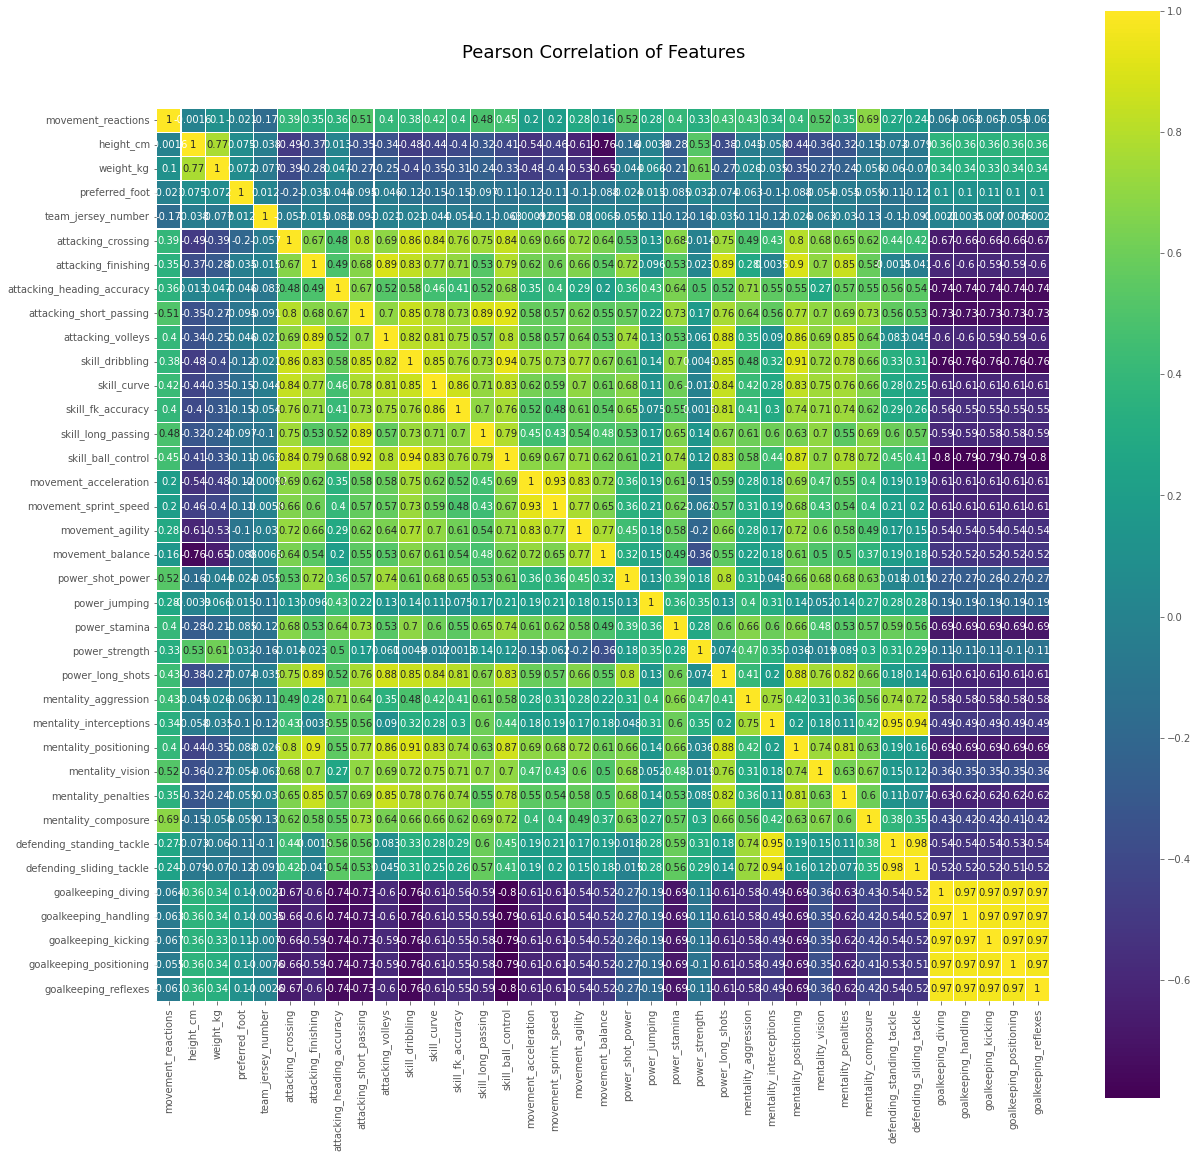

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sb.heatmap(data[features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Con base a la matriz se decide eliminar las features que tengan una correlacion superior o igual a 0.97, pues se concluye que aportan la misma información al algoritmo

In [ ]:
features=['movement_reactions','height_cm','weight_kg','preferred_foot','team_jersey_number','attacking_crossing','attacking_finishing',	'attacking_heading_accuracy',
          'attacking_short_passing',	'attacking_volleys'	,'skill_dribbling',	'skill_curve',	'skill_fk_accuracy',	'skill_long_passing',	'skill_ball_control',	
          'movement_acceleration'	,'movement_sprint_speed',	'movement_agility'	,'movement_balance'	,'power_shot_power',	'power_jumping',
          'power_stamina',	'power_strength',	'power_long_shots',	'mentality_aggression',	'mentality_interceptions',	'mentality_positioning'	,'mentality_vision'	,
          'mentality_penalties',	'mentality_composure'	,'defending_sliding_tackle','goalkeeping_handling']
data=data[features+target]

Se observa la forma de la tabla.

In [ ]:
np.shape(data)

(18719, 33)

In [ ]:
data.index=range(18719)

Se observa el final de las filas para apreciar cómo están los datos.

In [ ]:
data.tail()

movement_reactions  height_cm  weight_kg  preferred_foot  \
18714                51.0      176.0       73.0             1.0   
18715                48.0      177.0       70.0             1.0   
18716                45.0      185.0       74.0             1.0   
18717                51.0      186.0       80.0             1.0   
18718                44.0      185.0       79.0             1.0   

       team_jersey_number  attacking_crossing  attacking_finishing  \
18714                28.0                45.0                 37.0   
18715                25.0                23.0                 16.0   
18716                 2.0                20.0                 20.0   
18717                 4.0                38.0                 32.0   
18718                33.0                44.0                 32.0   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
18714                        43.0                     55.0               27.0   
18715                        45.0                     31.0               26.0   
18716                        46.0                     40.0               22.0   
18717                        45.0                     56.0               32.0   
18718                        44.0                     56.0               35.0   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
18714             44.0         35.0               35.0                53.0   
18715             19.0         21.0               22.0                25.0   
18716             35.0         20.0               25.0                25.0   
18717             45.0         35.0               35.0                54.0   
18718             46.0         37.0               33.0                56.0   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
18714                46.0                   64.0                   62.0   
18715                24.0                   60.0                   56.0   
18716                30.0                   54.0                   49.0   
18717                48.0                   62.0                   60.0   
18718                43.0                   67.0                   64.0   

       movement_agility  movement_balance  power_shot_power  power_jumping  \
18714              53.0              71.0              43.0           57.0   
18715              45.0              70.0              35.0           65.0   
18716              40.0              57.0              35.0           69.0   
18717              59.0              53.0              45.0           56.0   
18718              56.0              55.0              49.0           59.0   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
18714           40.0            51.0              36.0                  57.0   
18715           55.0            45.0              23.0                  44.0   
18716           58.0            55.0              22.0                  46.0   
18717           48.0            63.0              33.0                  56.0   
18718           54.0            62.0              34.0                  57.0   

       mentality_interceptions  mentality_positioning  mentality_vision  \
18714                     41.0                   31.0              49.0   
18715                     50.0                   25.0              25.0   
18716                     45.0                   25.0              25.0   
18717                     40.0                   31.0              45.0   
18718                     35.0                   48.0              44.0   

       mentality_penalties  mentality_composure  defending_sliding_tackle  \
18714                 39.0                 36.0                      54.0   
18715                 35.0                 40.0                      47.0   
18716                 35.0                 40.0                      45.0   
18717                 42.0                 43.0                    

Se busca si hay datos sin información o vacíos.

In [ ]:
check_for_nan = data.isnull().values.any()
print(check_for_nan)

False


In [ ]:
np.shape(data)

(18719, 33)

Se importa KFold para separar los datos en entrenamiento y prueba, se usa un árbol clasificador de decisión bajo el criterio gini. 
Además se revisa la exactitud promedio de los resultados obtenidos en este entrenamiento para diferentes profundidades de árbol.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=80,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374064
         3          0.463111
         4          0.518672
         5          0.542664
         6          0.576261
         7          0.605427
         8          0.628878
         9          0.641005
        10          0.642821
        11          0.649231
        12          0.650139
        13          0.649498
        14          0.650406
        15          0.649872
        16          0.649926
        17          0.649926
        18          0.649819
        19          0.649712
        20          0.649819
        21          0.649712
        22          0.649765
        23          0.649658
        24          0.649605
        25          0.649605
        26          0.649658
        27          0.649658
        28          0.649712
        29          0.649605
        30          0.649552
        31          0.649658
        32          0.649712
        33          0.649712


Se realiza el mismo procedimiento anterior, pero se varía el número mínimo de jugadores por hoja (40).

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=80,
                                             min_samples_leaf=40,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.518672
         5          0.542770
         6          0.580056
         7          0.608796
         8          0.631552
         9          0.645015
        10          0.646136
        11          0.650089
        12          0.651745
        13          0.651478
        14          0.651372
        15          0.651532
        16          0.651265
        17          0.651372
        18          0.651372
        19          0.651372
        20          0.651372
        21          0.651372
        22          0.651372
        23          0.651372
        24          0.651372
        25          0.651372
        26          0.651372
        27          0.651372
        28          0.651372
        29          0.651372
        30          0.651372
        31          0.651372
        32          0.651372
        33          0.651372


Por último, se prueba con un número mínimo de jugadores por hoja de 80.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=80,
                                             min_samples_leaf=80,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.518725
         5          0.542503
         6          0.577652
         7          0.604842
         8          0.624927
         9          0.636680
        10          0.636306
        11          0.639298
        12          0.639458
        13          0.639405
        14          0.639405
        15          0.639405
        16          0.639405
        17          0.639405
        18          0.639405
        19          0.639405
        20          0.639405
        21          0.639405
        22          0.639405
        23          0.639405
        24          0.639405
        25          0.639405
        26          0.639405
        27          0.639405
        28          0.639405
        29          0.639405
        30          0.639405
        31          0.639405
        32          0.639405
        33          0.639405


Ahora, se repite el procedimiento realizado al inicio, pero se varía el número mínimo de jugadores para dividir un nodo (500).

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=500,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.516375
         5          0.533628
         6          0.568564
         7          0.592388
         8          0.611138
         9          0.612741
        10          0.611940
        11          0.611940
        12          0.611993
        13          0.611993
        14          0.611940
        15          0.611993
        16          0.611940
        17          0.611940
        18          0.611993
        19          0.611993
        20          0.611993
        21          0.611940
        22          0.611940
        23          0.611940
        24          0.611886
        25          0.611993
        26          0.611993
        27          0.611993
        28          0.611993
        29          0.611993
        30          0.611993
        31          0.611993
        32          0.611993
        33          0.611940


Se realiza la misma prueba, teniendo 500 jugadores minimos para dividir un nodo y ahora aumentando el número mínimo de jugadores por hoja a 40.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=500,
                                             min_samples_leaf=40,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.516375
         5          0.533628
         6          0.568617
         7          0.592549
         8          0.611299
         9          0.612527
        10          0.611673
        11          0.611512
        12          0.611566
        13          0.611566
        14          0.611566
        15          0.611566
        16          0.611566
        17          0.611566
        18          0.611566
        19          0.611566
        20          0.611566
        21          0.611566
        22          0.611566
        23          0.611566
        24          0.611566
        25          0.611566
        26          0.611566
        27          0.611566
        28          0.611566
        29          0.611566
        30          0.611566
        31          0.611566
        32          0.611566
        33          0.611566


Se prueba ahora con 500 jugadores minimos para dividir un nodo y un número de jugadores por hoja mínimo de 80.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=500,
                                             min_samples_leaf=80,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.516375
         5          0.533628
         6          0.568617
         7          0.592175
         8          0.610177
         9          0.612153
        10          0.611085
        11          0.610925
        12          0.610925
        13          0.610925
        14          0.610925
        15          0.610925
        16          0.610925
        17          0.610925
        18          0.610925
        19          0.610925
        20          0.610925
        21          0.610925
        22          0.610925
        23          0.610925
        24          0.610925
        25          0.610925
        26          0.610925
        27          0.610925
        28          0.610925
        29          0.610925
        30          0.610925
        31          0.610925
        32          0.610925
        33          0.610925


Ahora se varía el número mínimo de jugadores para la division a 200, y se inicia con un número mínimo de jugadores por hoja de 80.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=200,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.518672
         5          0.542770
         6          0.577919
         7          0.605697
         8          0.626156
         9          0.635825
        10          0.636520
        11          0.639191
        12          0.639244
        13          0.639030
        14          0.639671
        15          0.639832
        16          0.639939
        17          0.639939
        18          0.639939
        19          0.639939
        20          0.639939
        21          0.639939
        22          0.639939
        23          0.639939
        24          0.639939
        25          0.639939
        26          0.639939
        27          0.639939
        28          0.639939
        29          0.639939
        30          0.639939
        31          0.639939
        32          0.639939
        33          0.639939


Se prueba lo anterior con un número mínimo de jugadores por hoja de 40.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=200,
                                             min_samples_leaf=40,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.518672
         5          0.542717
         6          0.578400
         7          0.606072
         8          0.626691
         9          0.636734
        10          0.636146
        11          0.638229
        12          0.638390
        13          0.638550
        14          0.638870
        15          0.638870
        16          0.638870
        17          0.638870
        18          0.638870
        19          0.638870
        20          0.638870
        21          0.638870
        22          0.638870
        23          0.638870
        24          0.638870
        25          0.638870
        26          0.638870
        27          0.638870
        28          0.638870
        29          0.638870
        30          0.638870
        31          0.638870
        32          0.638870
        33          0.638870


Finalmente, de igual forma que en los casos anteriores, se prueba con un número mínimo de jugadores por hoja igual a 80.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=200,
                                             min_samples_leaf=80,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.280360
         2          0.374117
         3          0.463111
         4          0.518725
         5          0.542503
         6          0.577118
         7          0.604308
         8          0.623912
         9          0.633955
        10          0.633528
        11          0.636145
        12          0.635931
        13          0.635985
        14          0.635985
        15          0.635985
        16          0.635985
        17          0.635985
        18          0.635985
        19          0.635985
        20          0.635985
        21          0.635985
        22          0.635985
        23          0.635985
        24          0.635985
        25          0.635985
        26          0.635985
        27          0.635985
        28          0.635985
        29          0.635985
        30          0.635985
        31          0.635985
        32          0.635985
        33          0.635985


Ahora, se prueba un criterio tipo "entropy" o entropía. Para el resultado con mejor y pero exactitud de los obtenidos anteriormente con la métrica gini

Se usa un número mínimo de jugadores para dividir un nodo de 80 y un número mínimo de jugadores por hoja de 40.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=80,
                                             min_samples_leaf=40,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.306587
         2          0.473159
         3          0.520217
         4          0.543566
         5          0.586147
         6          0.613229
         7          0.629843
         8          0.650731
         9          0.651692
        10          0.654309
        11          0.654843
        12          0.652814
        13          0.653615
        14          0.653722
        15          0.653722
        16          0.653561
        17          0.653722
        18          0.653722
        19          0.653561
        20          0.653561
        21          0.653722
        22          0.653722
        23          0.653722
        24          0.653561
        25          0.653561
        26          0.653722
        27          0.653561
        28          0.653561
        29          0.653561
        30          0.653561
        31          0.653722
        32          0.653722
        33          0.653561


En este caso se aumenta el número de jugadores para la división a 500 y se usa un número de jugadores por hoja de 80.

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=500,
                                             min_samples_leaf=80,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['positionEncoded'], axis=1), 
                               y = f_train["positionEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['positionEncoded'], axis=1), 
                                y = f_valid["positionEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.306587
         2          0.473159
         3          0.520217
         4          0.543566
         5          0.578501
         6          0.599816
         7          0.610713
         8          0.614079
         9          0.614079
        10          0.614079
        11          0.614079
        12          0.614079
        13          0.614079
        14          0.614079
        15          0.614079
        16          0.614079
        17          0.614079
        18          0.614079
        19          0.614079
        20          0.614079
        21          0.614079
        22          0.614079
        23          0.614079
        24          0.614079
        25          0.614079
        26          0.614079
        27          0.614079
        28          0.614079
        29          0.614079
        30          0.614079
        31          0.614079
        32          0.614079
        33          0.614079


Se decide entonces que con "entropy" se obtiene una exactitud levemente mejor, y la mejor exactitud obtenida es cuando el numero minimo de jugadores en un nodo antes de su division es de 80, y que el numero minimo de jugadores por hoja sea de 40

Se define que el 25% de los datos sean destinados para la prueba, tomados de manera aleatoria.

In [ ]:
X = data.drop(['positionEncoded'], axis=1)
y = data['positionEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 1)

Se entrena el árbol de decisión con los parámetros escogidos previamente

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=80,
                                             min_samples_leaf=40,
                                             max_depth = 23,
                                             class_weight={1:1},
                                             random_state=1) 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={1: 1}, criterion='entropy', max_depth=23,
                       min_samples_leaf=40, min_samples_split=80,
                       random_state=1)

Se asigna la importancia correspondiente a cada Feature para el árbol de decision entrenado.

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(decision_tree.feature_importances_,32)})
importances = importances.sort_values('importance',ascending=False)
importances

feature  importance
30    defending_sliding_tackle    0.350296
23            power_long_shots    0.152575
26       mentality_positioning    0.082749
7   attacking_heading_accuracy    0.078947
5           attacking_crossing    0.073486
3               preferred_foot    0.061641
6          attacking_finishing    0.037000
27            mentality_vision    0.029190
13          skill_long_passing    0.028015
16       movement_sprint_speed    0.025287
25     mentality_interceptions    0.017044
1                    height_cm    0.014537
15       movement_acceleration    0.010060
8      attacking_short_passing    0.009448
22              power_strength    0.007231
9            attacking_volleys    0.003967
20               power_jumping    0.002799
10             skill_dribbling    0.002617
14          skill_ball_control    0.002407
28         mentality_penalties    0.001849
24        mentality_aggression    0.001730
29         mentality_composure    0.001586
19            power_shot_power    0.001585
12           skill_fk_accuracy    0.000911
11                 skill_curve    0.000816
2                    weight_kg    0.000729
18            movement_balance    0.000663
17            movement_agility    0.000439
21               power_stamina    0.000397
0           movement_reactions    0.000000
4           team_jersey_number    0.000000
31        goalkeeping_handling    0.000000

Se grafica el árbol de decisión obtenido.

In [ ]:
# exportar el modelo a archivo .dot y graficar
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 23,
                              impurity = True,
                              feature_names = list(data.drop(['positionEncoded'], axis=1)),
                              class_names = class_names,
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Se analiza la veracidad de los resultados empleando una matriz de confusión del árbol de decisión en validación para el set de prueba.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


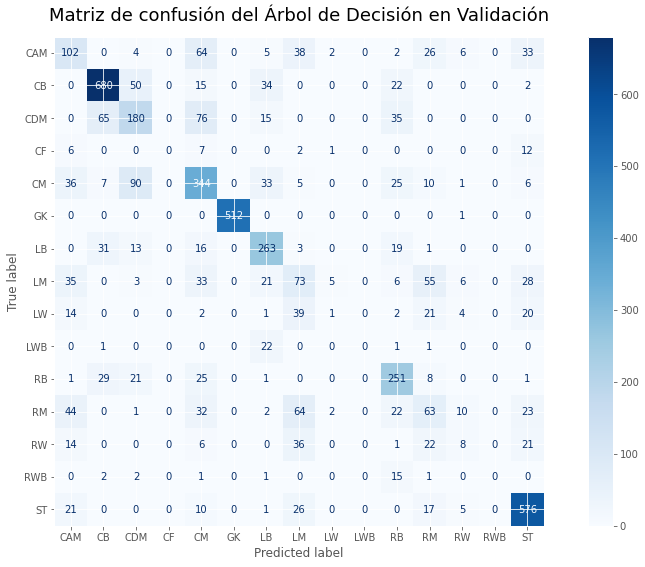

In [ ]:
disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en Validación', y=1.02, size=18)

plt.show()

Se observa que los resultados no son los mejores, sin embargo sí se aprecia que la diagonal principal de la matriz contiene la mayoría de puntajes altos.

Se realiza el mismo procedimiento para el set de entrenamiento.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


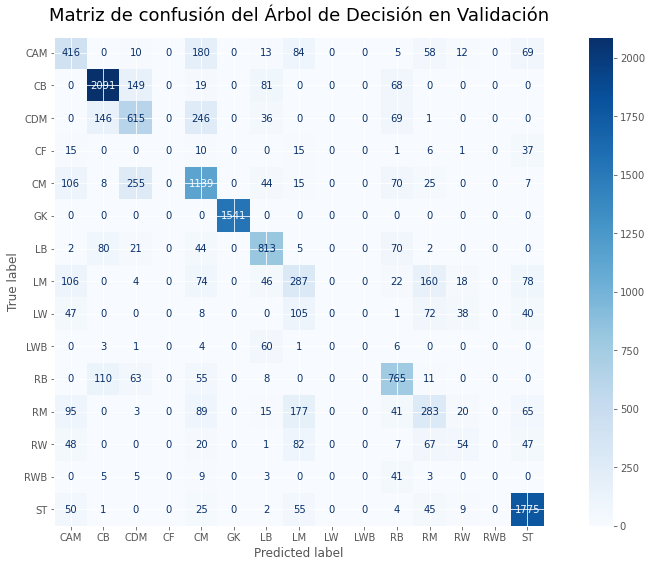

In [ ]:
disp = plot_confusion_matrix(decision_tree, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en Validación', y=1.02, size=18)

plt.show()

De igual forma, se observa que en su mayoría, los resultados con mayor puntaje se organizan en la diagonal de la matriz, tal como se busca.

Ahora, se analiza la exactitud, la precisión y la sensibilidad para el set de entrenamiento.

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
y_pred_train = decision_tree.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print("Train set accuracy: {:.2f}".format(acc_train))

precision_train=precision_score(y_train, y_pred_train, average=None)
print("Train set precision: {:.2f}".format(precision_train.mean()))

recall_train=recall_score(y_train, y_pred_train, average=None)
print("Train set recall: {:.2f}".format(recall_train.mean()))

f1_train=f1_score(y_train, y_pred_train, average=None)
print("Train set F1: {:.2f}".format(f1_train.mean()))

Train set accuracy: 0.70
Train set precision: 0.47
Train set recall: 0.46
Train set F1: 0.46


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se observan unos resultados de:

Exactitud: 70%

Precisión: 47%

Sensibilidad: 46%

F1: 46%


Se realiza el mismo procedimiento para el set de prueba.

In [ ]:
y_pred_test = decision_tree.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: {:.2f}".format(acc_test))

precision_test=precision_score(y_test, y_pred_test, average=None)
print("Test set precision: {:.2f}".format(precision_test.mean()))

recall_test=recall_score(y_test, y_pred_test, average=None)
print("Test set recall: {:.2f}".format(recall_test.mean()))

f1_test=f1_score(y_test, y_pred_test, average=None)
print("Test set F1: {:.2f}".format(f1_test.mean()))

Test set accuracy: 0.65
Test set precision: 0.41
Test set recall: 0.42
Test set F1: 0.41


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se observan resultados de:

Exactitud: 65%

Precisión: 41%

Sensibilidad: 42%

F1: 41%

Se calcula la probabilidad de acertar para la predicción a realizar.
En este caso, se usa la información de Cristiano Ronaldo y el algoritmo del árbol de decisión.

In [ ]:
x_test = pd.DataFrame(columns=features+target)
x_test.loc[0] = (95,187,83,1,7,84,95,90,82,86,88,81,76,77,92,87,91,87,71,94,95,84,78,93,63,29,95,82,84,95,24,11,14)

y_pred = decision_tree.predict(x_test.drop(['positionEncoded'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['positionEncoded'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][int(y_pred)]* 100, 2))+"%")

Prediccion: [14.]
Probabilidad de Acierto: 83.33%


Se observa que la predicción realizada con el árbol de decisión tiene una probabilidad de ser correcta de 83.33%.
Al revisar el dataset suministrado, se confirma que la predicción es, de hecho, correcta.

In [ ]:
data.head()

movement_reactions  height_cm  weight_kg  preferred_foot  \
0                94.0      170.0       72.0             0.0   
1                95.0      187.0       83.0             1.0   
2                88.0      188.0       87.0             1.0   
3                93.0      184.0       80.0             1.0   
4                91.0      175.0       68.0             1.0   

   team_jersey_number  attacking_crossing  attacking_finishing  \
0                10.0                85.0                 95.0   
1                 7.0                84.0                 95.0   
2                13.0                13.0                 11.0   
3                 9.0                71.0                 94.0   
4                10.0                85.0                 87.0   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                        70.0                     91.0               88.0   
1                        90.0                     82.0               86.0   
2                        15.0                     43.0               13.0   
3                        85.0                     84.0               89.0   
4                        62.0                     87.0               87.0   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0             96.0         93.0               94.0                91.0   
1             88.0         81.0               76.0                77.0   
2             12.0         13.0               14.0                40.0   
3             85.0         79.0               85.0                70.0   
4             95.0         88.0               89.0                81.0   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                96.0                   91.0                   80.0   
1                92.0                   87.0                   91.0   
2                30.0                   43.0                   60.0   
3                88.0                   77.0                   78.0   
4                95.0                   94.0                   89.0   

   movement_agility  movement_balance  power_shot_power  power_jumping  \
0              91.0              95.0              86.0           68.0   
1              87.0              71.0              94.0           95.0   
2              67.0              49.0              59.0           78.0   
3              77.0              82.0              89.0           84.0   
4              96.0              83.0              80.0           62.0   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0           72.0            69.0              94.0                  44.0   
1           84.0            78.0              93.0                  63.0   
2           41.0            78.0              12.0                  34.0   
3           76.0            86.0              85.0                  81.0   
4           81.0            50.0              84.0                  51.0   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                     40.0                   93.0              95.0   
1                     29.0                   95.0              82.0   
2                     19.0                   11.0              65.0   
3                     49.0                   94.0              79.0   
4                     36.0                   87.0              90.0   

   mentality_penalties  mentality_composure  defending_sliding_tackle  \
0                 75.0                 96.0                      24.0   
1                 84.0                 95.0                      24.0   
2                 11.0                 68.0                      18.0   
3                 88.0                 88.0                      19.0   
4                 92.0                 93.0                      29.0   

   goalkeeping_handling  positionEncoded  
0                  11.0             12.0  
1                  11.0             14

# Clasificador Bayesiano

Se importan las librerías necesarias para el clasificador.

In [ ]:
# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

Se entrena el clasificador y se estudia la exactitud del set de entrenamiento y de prueba.



In [ ]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[features].values,
    y_train
)
Y_pred = gnb.predict(X_test[features])
 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[features], y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(gnb.score(X_test[features], y_test)))

Exactitud en el Entrenamiento: 0.63
Exactitud en la Validación (test): 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Se obtiene una exactitud del 63% para el Entrenamiento y del 62% para la validación

Luego se grafican los resultados obtenidos para el set de entrenamiento a través de una matriz de confusión.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


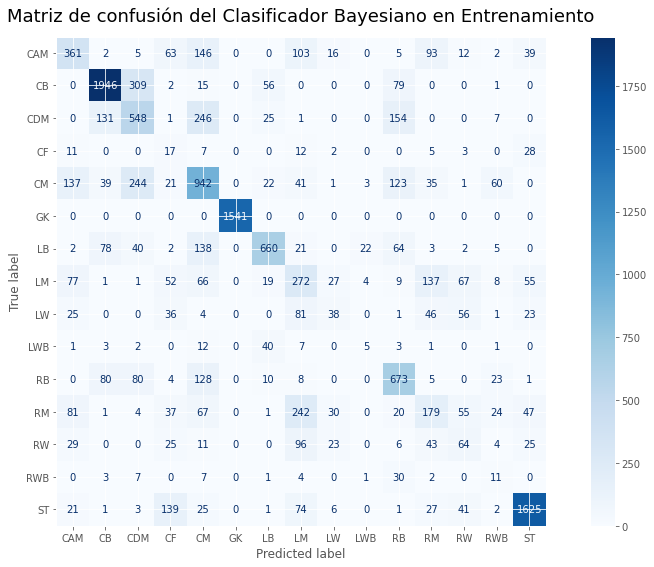

In [ ]:
disp = plot_confusion_matrix(gnb, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Entrenamiento', y=1.02, size=18)

plt.show()

Se puede apreciar que hay algunos valores un poco desviados de la diagonal, pero en general la mayoría se posan sobre esta.

De igual manera, se grafican los resultados para el set de prueba.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


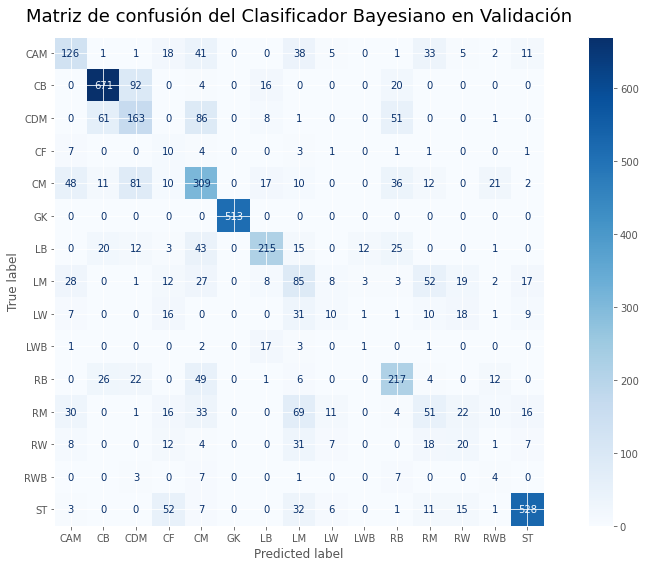

In [ ]:
disp = plot_confusion_matrix(gnb, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Validación', y=1.02, size=18)

plt.show()

De igual forma, aunque gráficamente no es el resultado ideal, es satisfactorio.

De igual manera que en el caso anterior, se prueba la predicción con las características de Cristiano Ronaldo y se usa el algoritmo llamado Gaussian Naive Bayes. 

In [ ]:
x_test = pd.DataFrame(columns=features+target)
x_test.loc[0] = (95,187,83,1,7,84,95,90,82,86,88,81,76,77,92,87,91,87,71,94,95,84,78,93,63,29,95,82,84,95,24,11,14)

y_pred = gnb.predict(x_test.drop(['positionEncoded'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = gnb.predict_proba(x_test.drop(['positionEncoded'], axis = 1))
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][int(y_pred)]* 100, 2))+"%")


Prediccion: [3.]
Probabilidad de Acierto: 100.0%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Finalmente, se obtiene que la predicción es correcta con un 100% de probabilidad. Sin embargo, al revisar el dataset original, se observa que Cristiano Ronaldo no juega en esta posición, pero podría entenderse que tiene potencial en esta. Además que es una posición cercana a la verdadera

Para concluir, se puede afirmar que aunque la exactitud, la precisión y la sensibilidad de los algoritmos usados a lo largo del programa no son ideales; algunos de ellos tienen potencial de hacer un buen trabajo si se analizan los resultados. Además de esto, es difícil esperar que estos valores sean mejores, pues desde las matrices de confusión se puede apreciar que algunos de los valores de la variable objetivo no están presentes en la diagonal con intensidad suficiente (colores muy claros).

Por otra parte, se evidencia que aunque el algoritmo del árbol de decisión usado presenta una probabilidad de 83% de estar correcto en su predicción para los datos de Cristiano Ronaldo, esta es correcta, o, mejor dicho, se puede comprobar que el jugador desempeña un buen trabajo en esta posición. Contrario al resultado obtenido con el algoritmo GNB, que dice estar 100% correcto, se tiene que Cristiano Ronaldo no juega en esta posición, sin embargo, tendría que realizarse un análisis sobre cómo se desempeñaría el jugador en esta posición y así poder concluir que el algoritmo usado hizo un buen o un mal trabajo.